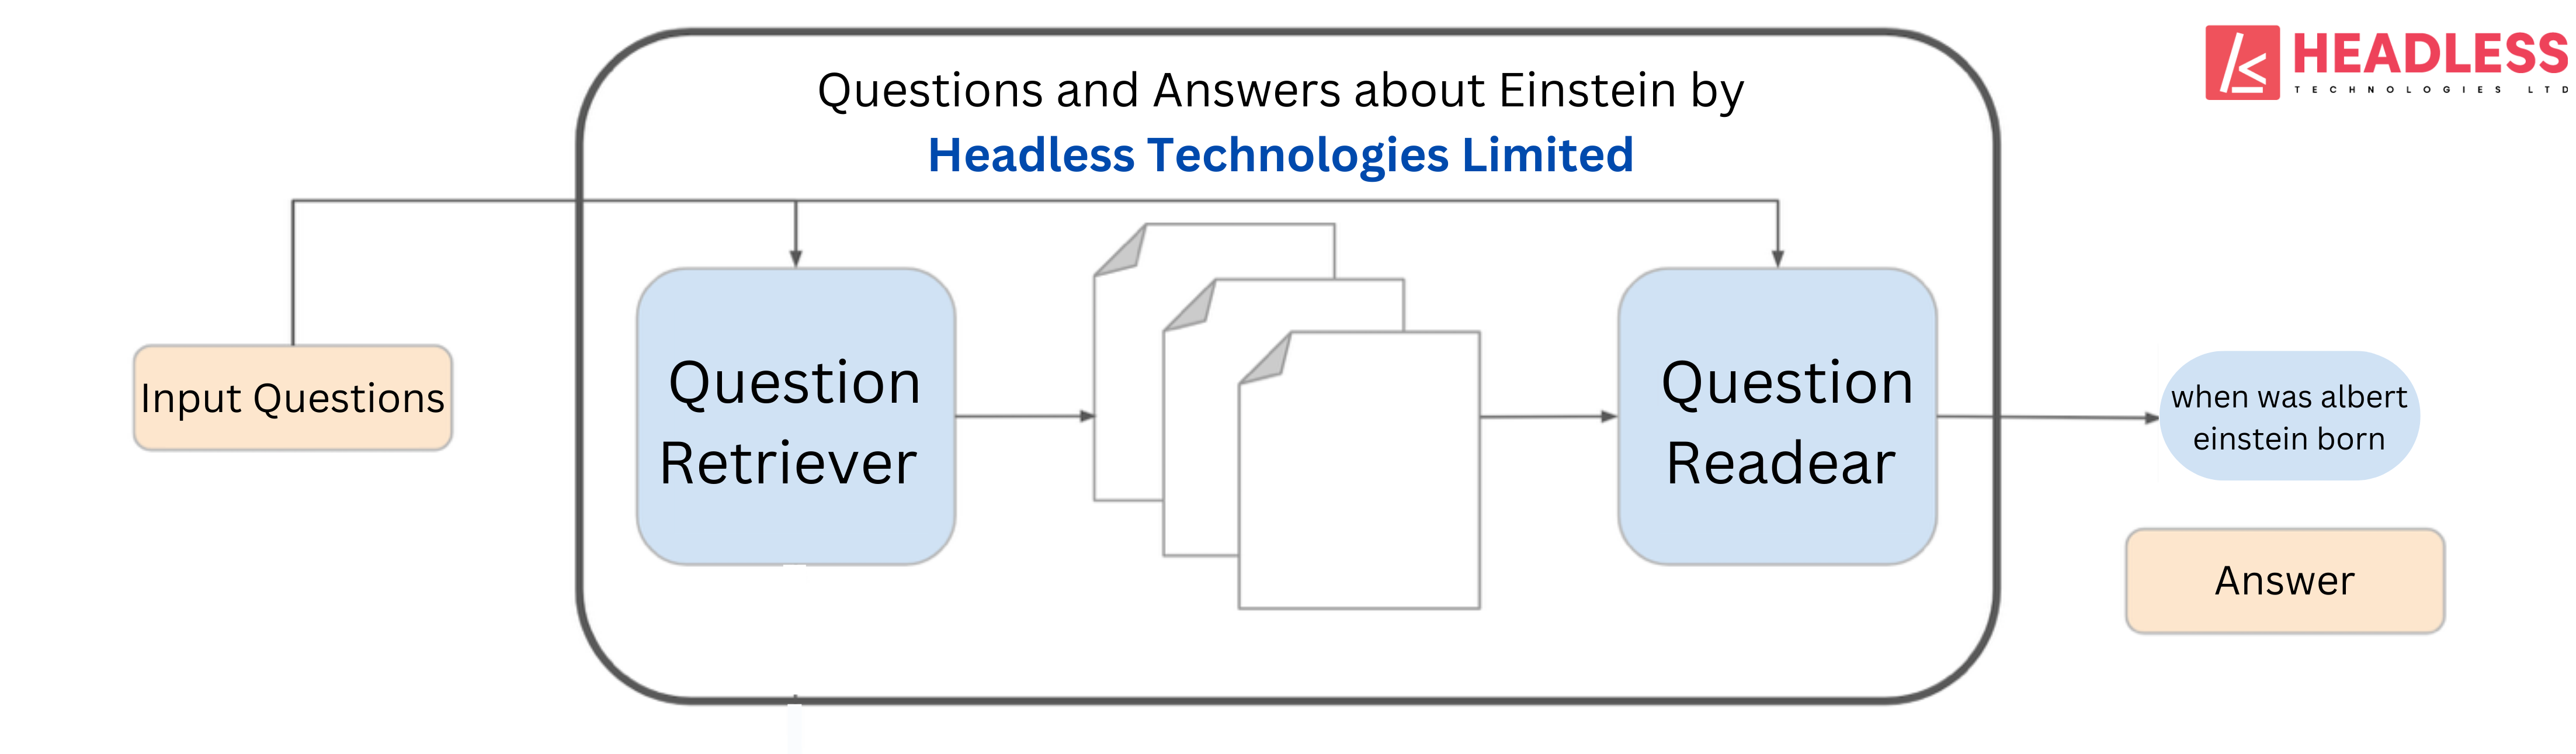

In [1]:
from IPython.display import Image
Image("../input/dataret/QuestionRetriever.png")

In [2]:
!pip3 install fse
!pip3 install transformers
# !pip3 install torch
! pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
  Created wheel for fse: filename=fse-1.0.0-cp37-cp37m-linux_x86_64.whl size=280872 sha256=1c26eebd0bd53ed8105e7cca414c212619c337f3e89ea57d5952a8d6772ae7c4
  Stored in directory: /root/.cache/pip/wheels/d5/65/7e/900c293350aa3b6bcaefcd66ec5757d43206b610a467093993
Successfully built fse
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.4 MB/s eta 0:00:00


In [3]:
import math
import os
import spacy
import re

import fse
import gensim
import gensim.downloader as api
import nltk
import numpy as np
import pandas as pd
from fse import SplitIndexedList
from fse.models import uSIF
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('wordnet')
nltk.download('stopwords')
import logging
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
from transformers import BertForQuestionAnswering, BertTokenizer
from gensim.parsing.preprocessing import preprocess_string
from gensim.models import Word2Vec
import gensim.downloader
import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [4]:
# Reading in the dataset
df = pd.read_csv('../input/faquestions/FAQ/FAQs.csv')

In [5]:
df.head()

,Question,Answer
0,When was Albert Einstein born?,Albert Einstein was born on 14 March 1879.
1,Where was he born?,"He was born in Ulm, Germany."
2,When did he die?,"He died 18 April 1955 in Princeton, New Jersey, USA."
3,Who were his parents?,His father was Hermann Einstein and his mother was Pauline Einstein (born Koch).
4,Did he have any sisters and brothers?,He had one sister named Maja.


<h2> </h2>

If I am going to do this NLP assignment, there are a few fundamental measures that I need to perform in order to assist the program in comprehending natural language:

<ol>
        <li> Sentence Segmentation</li>
        <li>Word Tokenization</li>
        <li>Text Lemmatization</li>
        <li>Stop Words</li>
        <li>Dependency Parsing</li>
        <li>Named Entity Recognition (NER)</li>      
 </ol>

# 1. Sentence Segmentation

In [6]:
nlp = spacy.load("en_core_web_sm")
questionText = df["Answer"][8]
doc = nlp(questionText)
#to print sentences
for sent in doc.sents:
    print(sent)


The Nobel Prize was announced on 9 November 1922.
Being too remote from Sweden, Albert Einstein could not attend the Nobel Prize Award Ceremony in Stockholm on 10 December the same year.


# 2. Word Tokenization

In [7]:
nltk_tokens = nltk.word_tokenize(questionText)
print (nltk_tokens)

['The', 'Nobel', 'Prize', 'was', 'announced', 'on', '9', 'November', '1922', '.', 'Being', 'too', 'remote', 'from', 'Sweden', ',', 'Albert', 'Einstein', 'could', 'not', 'attend', 'the', 'Nobel', 'Prize', 'Award', 'Ceremony', 'in', 'Stockholm', 'on', '10', 'December', 'the', 'same', 'year', '.']


In [8]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

# 3. Lemmatizations

In [9]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text = df["Answer"][8]
tokens = word_tokenize(text)
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    print(token, "=>", lemma)

The => The
Nobel => Nobel
Prize => Prize
was => be
announced => announce
on => on
9 => 9
November => November
1922 => 1922
. => .
Being => Being
too => too
remote => remote
from => from
Sweden => Sweden
, => ,
Albert => Albert
Einstein => Einstein
could => could
not => not
attend => attend
the => the
Nobel => Nobel
Prize => Prize
Award => Award
Ceremony => Ceremony
in => in
Stockholm => Stockholm
on => on
10 => 10
December => December
the => the
same => same
year => year
. => .


# 4. Stop Words

In [10]:
data = df['Answer'][8]
stopWords = set(stopwords.words('english'))
words = word_tokenize(data)
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)

['The', 'Nobel', 'Prize', 'announced', '9', 'November', '1922', '.', 'Being', 'remote', 'Sweden', ',', 'Albert', 'Einstein', 'could', 'attend', 'Nobel', 'Prize', 'Award', 'Ceremony', 'Stockholm', '10', 'December', 'year', '.']


Text(0.5, 1.0, 'Distribution of text word count of 10 Rows ')

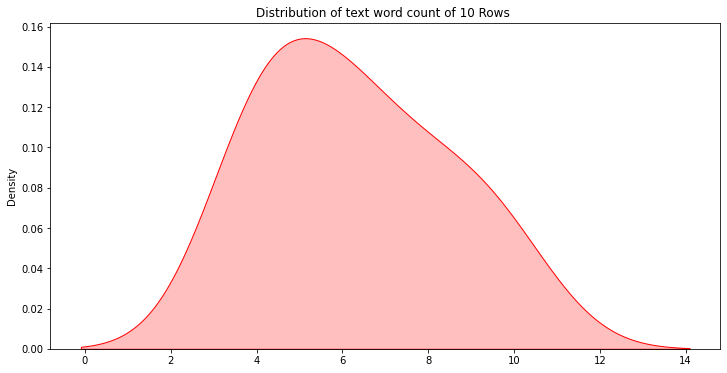

In [11]:
#check the distribution of word count in sample 10 Rows
doc_text_words = df['Question'].apply(lambda x: len(x.split(' ')))
plt.figure(figsize=(12,6))
sns.kdeplot(doc_text_words.values,shade=True, color="r").set_title('Distribution of text word count of ' + str(10) + ' Rows ')

In [12]:
# stop_words = set(stopwords.words('english'))
def cleanQuestion(text):
    text = str(text)
  # wnl = nltk.stem.WordNetLemmatizer()
    text = text.lower()
    words = re.sub(r'[^\w\s]', '', text).split()
    # words = [word for word in words if not word in stop_words]
    return " ".join([word for word in words])

def cleanAnswer(text):
    text = str(text)
    # wnl = nltk.stem.WordNetLemmatizer()
    text = text.lower()
    words = re.sub(r'[^\w\s]', '', text).split()
    # words = [word for word in words if not word in stop_words]
    return " ".join([word for word in words])

def cleanText(text):
    text = str(text)
    # wnl = nltk.stem.WordNetLemmatizer()
    text = text.lower()
    words = re.sub(r'[^\w\s\.\?]', '', text).split()
    # words = [word for word in words if not word in stop_words]
    return " ".join([word for word in words])

In [13]:
df['Question'] = df['Question'].apply(lambda x: cleanQuestion(x))
df['Answer'] = df['Answer'].apply(lambda x: cleanAnswer(x))
df.head()

,Question,Answer
0,when was albert einstein born,albert einstein was born on 14 march 1879
1,where was he born,he was born in ulm germany
2,when did he die,he died 18 april 1955 in princeton new jersey usa
3,who were his parents,his father was hermann einstein and his mother was pauline einstein born koch
4,did he have any sisters and brothers,he had one sister named maja


In [14]:
# Preparing data for training
allQuestion = '. '.join(list(df['Question']))
allAnswer = '. '.join(list(df['Answer']))

text = allQuestion + allAnswer
s = SplitIndexedList(text.split('.'))

## **Word2Vec**

In [15]:
dataset = []
for i in range(0, len(df), 2):
    dataset.append(df.iloc[i]['Question'].split())
    dataset.append(df.iloc[i]['Answer'].split())

In [16]:
model_wv = gensim.models.Word2Vec(dataset, vector_size=100, window=8, min_count=1, sg=0, workers=8) # I have 8 cpu cores
# sg = {0, 1} – Training algorithm: 1 for skip-gram; otherwise CBOW

In [17]:
model_wv.train(dataset, total_examples=len(dataset), compute_loss=True, epochs=50)

(2316, 6450)

In [18]:
def get_embedding(sentence):
    pos_sum = [0.0 for i in range(100)]
    num = 0
    words = sentence.split()
    for i in words:
        try:
            embed = model_wv.wv[i]
        except:
            continue
        else:
            pos_sum += embed
            num +=1
    if(num==0):
        return pos_sum
    else:
        pos_sum /= num
    return pos_sum

# get answer using euclidean distance
def get_answer(question, answer_para):
    question_embedding = get_embedding(rem_stop(question))
    min_distance = math.inf
    answer = 0
    for i in range(len(answer_para)):
        answer_embedding = get_embedding(rem_stop(answer_para[i]))
        distance = np.linalg.norm(question_embedding-answer_embedding)
    if (distance < min_distance):
        answer = i
      # print(answer)
        min_distance = distance
    return answer_para[answer]

def rem_stop(sentence):
    strr=''
    my_string = sentence.split()
    for i in range(len(my_string)):
        if my_string[i] not in stopwords.words('english'):
            strr = strr+' '+my_string[i]
    return strr[1:]

# get answer using cosine similarity
def get_answer_cosine(question, answer_para):
    question_embedding = get_embedding(rem_stop(question))
    max_similarity = -math.inf
    answer = 0
    for i in range(len(answer_para)):
        answer_embedding = get_embedding(rem_stop(answer_para[i]))
        similarity = cosine_similarity(np.expand_dims(question_embedding,0), np.expand_dims(answer_embedding,0))
        if (similarity > max_similarity):
            answer = i
            max_similarity = similarity
    return answer_para[answer]

In [19]:
index = 2
my_text = df.iloc[index]['Answer']
temp_sentences = my_text.split(sep='.')
sentences=[]
for i in range(len(temp_sentences)):
    if(temp_sentences[i]!=''):
        sentences.append(temp_sentences[i])
my_question = df.iloc[index]['Question']

In [20]:
# Function to break up article text into individual sentences
def contextToSents(my_text):
    temp_sentences = my_text.split(sep='.')
    sentences=[]
    for i in range(len(temp_sentences)):
        if(temp_sentences[i]!=''):
            sentences.append(temp_sentences[i])
    return sentences

In [21]:
# Word2Vec outputs
print(my_question) # Actual Question
print(rem_stop(my_question)) # Answer without stopwords
print(df.iloc[index]['Answer']) # Actual Answer
print(get_answer(my_question, sentences)) # Our model's prediction using euclidean distance
print("\n")
print(get_answer_cosine(my_question, sentences)) # Our model's prediction using cosine similarity

when did he die
die
he died 18 april 1955 in princeton new jersey usa
he died 18 april 1955 in princeton new jersey usa


he died 18 april 1955 in princeton new jersey usa


# **Word2Vec / Embedding¶**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# defining the TF-IDF
tfidf_configs = {
    'lowercase': True,
    'analyzer': 'word',
    'stop_words': 'english',
    'binary': True,
    'max_df': 0.9,
    'max_features': 10000
}

In [23]:
# defining the number of documents to retrieve
retriever_configs = {
    'n_neighbors': 3,
    'metric': 'cosine'
}

In [24]:
# defining our pipeline
embedding = TfidfVectorizer(**tfidf_configs)
retriever = NearestNeighbors(**retriever_configs)

In [25]:
X = embedding.fit_transform(df['Question'])
retriever.fit(X, df['Question'])

NearestNeighbors(metric='cosine', n_neighbors=3)

In [26]:
def transform_text(vectorizer, text):
    print('Text:', text)
    vector = vectorizer.transform([text])
    vector = vectorizer.inverse_transform(vector)
    print('Vect:', vector)

In [27]:
# vectorize the question
question = df["Question"][0]
transform_text(embedding, question)

Text: when was albert einstein born
Vect: [array(['einstein', 'born', 'albert'], dtype='<U9')]


In [28]:
# create a corpus of tokens
corpus = df['Question'].tolist()
corpus = [preprocess_string(t) for t in corpus]
vectorizer = Word2Vec(sentences=corpus, vector_size=19, window=5, min_count=1, workers=4).wv
vectorizer.most_similar('born', topn=5)

[('children', 0.44091230630874634),
 ('physic', 0.17844729125499725),
 ('brother', 0.17246387898921967),
 ('educ', 0.155528262257576),
 ('attend', 0.08457696437835693)]

In [29]:
def transform_text2(vectorizer, text, verbose=False):
    tokens = preprocess_string(text)
    words = [vectorizer[w] for w in tokens if w in vectorizer]
    if verbose:
        print('Text:', text)
        print('Vector:', [w for w in tokens if w in vectorizer])
    elif len(words):
        return np.mean(words, axis=0)
    else:
        return np.zeros((19), dtype=np.float32)

In [30]:
question = df["Question"][0]
transform_text2(vectorizer, question, verbose=True)

Text: when was albert einstein born
Vector: ['albert', 'einstein', 'born']


In [31]:
# predict the most similar document
X = embedding.transform([question])
Q_id = retriever.kneighbors(X, return_distance=False)[0][0]
selected = df.iloc[Q_id]['Question']

# vectorize the document
transform_text(embedding, selected)

Text: when was albert einstein born
Vect: [array(['einstein', 'born', 'albert'], dtype='<U9')]


## **SIF Embedding**

In [32]:
from fse.models import uSIF
glove = api.load("glove-wiki-gigaword-100")
model_sif = uSIF(glove, workers=2, lang_freq="en")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [33]:
model_sif.train(s)

(19, 292)

In [34]:
q = 'when was albert einstein born'
c1 = 'Albert Einstein was born at Ulm, in Württemberg, Germany, on March 14, 1879'
c2 = 'Albert Einstein, (born March 14, 1879, Ulm, Württemberg, Germany'
c3 = 'Albert Einstein Horoscope ; Date of Birth: Friday, March 14, 1879'

tmpq = (q.split(), 0)
tmpc1 = (c1.split(), 0)
tmpc2 = (c2.split(), 0)
tmpc3 = (c3.split(), 0)

print(metrics.pairwise.cosine_similarity(model_sif.infer([tmpq]), model_sif.infer([tmpc1])))
print(metrics.pairwise.cosine_similarity(model_sif.infer([tmpq]), model_sif.infer([tmpc2])))
print(metrics.pairwise.cosine_similarity(model_sif.infer([tmpq]), model_sif.infer([tmpc3])))

[[0.4383684]]
[[0.]]
[[0.17930609]]


In [35]:
def getSim(q, x):
    x = (str(x).split(), 0)
    sim = metrics.pairwise.cosine_similarity(model_sif.infer([q]), model_sif.infer([x]))
    return sim

def getAnswer(question, context):
    q = (str(question).split(), 0)
    c = pd.DataFrame(str(context).split('.'))
    c['sim'] = c[0].apply(lambda x: getSim(q, x))
    max = c.sort_values(by='sim', ascending=False).iloc[:3]
    return max

def getBestAnswer(question, potentials):
    q = (str(question).split(), 0)
    c = pd.DataFrame(potentials)
    c['sim'] = c[0].apply(lambda x: getSim(q, x))
    max = c.sort_values(by='sim', ascending=False).iloc[:3]
    return max[0]

In [36]:
qno = 2
print('Question: ', df['Question'].iloc[qno])
print('Top Solutions: \n')
print(getAnswer(df['Question'].iloc[qno], df['Answer'].iloc[qno]))

Question:  when did he die
Top Solutions: 

                                                   0             sim
0  he died 18 april 1955 in princeton new jersey usa  [[0.22150952]]


In [37]:
qno = 2
print('Question: ', df['Question'].iloc[qno])
print('Top Solutions: \n')
sol = getAnswer(df['Question'].iloc[qno], df['Answer'].iloc[qno])
print(sol)

Question:  when did he die
Top Solutions: 

                                                   0             sim
0  he died 18 april 1955 in princeton new jersey usa  [[0.22150952]]


## **BERT with SIF**

In [38]:
use_cuda = True
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model_bert = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

In [39]:
def getGraph(start_scores, end_scores, tokens):

    # x-axis: unique tokens
    # y-axis: start word score for each token

    # Pull the scores from Tensors and convert to 1-D np arrays
    start_scores = start_scores.detach().numpy().flatten()
    end_scores = end_scores.detach().numpy().flatten()

    # We add unique token index to each token
    token_label = list()
    for (i, t) in enumerate(tokens):
        token_label.append('{:} - {:>2}'.format(t, i))

    # Plot Graph
    sns.set(style='darkgrid')
    plt.rcParams["figure.figsize"] = (24,8)
    ax = sns.barplot(x=token_labels, y=s_scores, ci=None)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
    ax.grid(True)
    plt.title('Start Word Scores for Each unique Token in Context')
    plt.show()

In [40]:
model_sif.train(SplitIndexedList(list(df['Question'])))

(10, 63)

In [41]:
def get_split(text1):
    l_total = []
    l_parcial = []
    if len(text1.split())//150 >0:
        n = len(text1.split())//150
    else: 
        n = 1
    for w in range(n):
        if w == 0:
            l_parcial = text1.split()[:250]
            l_total.append(" ".join(l_parcial))
        else:
            l_parcial = text1.split()[w*150:w*150 + 250]
            l_total.append(" ".join(l_parcial))
    return l_total

In [42]:
def getAnswerBert(question, context):

  # print('Query Context has {} tokens.'.format(len(tokenizer.encode(context))))

    context_list = get_split(context)
    ans = []

    for c in context_list:

        encoding = tokenizer.encode_plus(text=question,text_pair=c)

        inputs = encoding['input_ids']  #Token embeddings
        token_type_id = encoding['token_type_ids']  #Segment embeddings
        tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens

        output = model_bert(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([token_type_id]))
        start_index = torch.argmax(output.start_logits)
        end_index = torch.argmax(output.end_logits)

        answer = ' '.join(tokens[start_index:end_index+1])

        ans.append(answer)
    print('Question: ', question)
    potentials = []
    for i in ans:
        if ('SEP' not in i) and ('CLS' not in i):
            potentials.append(re.sub('(#)+', '', i))
    answer = getBestAnswer(question, potentials)

  # print('Potential Answers: \n')
  # print(answer.head())
    return answer

In [43]:
print(getAnswerBert(df['Question'].iloc[9], df['Answer'].iloc[9]))
print("---------------------------------")
print('Actual Answer: ', df['Answer'].iloc[9])

Question:  for what did he receive the nobel prize
0    his discovery of the law of the photo ele ctric effect
Name: 0, dtype: object
---------------------------------
Actual Answer:  einstein was rewarded for his many contributions to theoretical physics and especially for his discovery of the law of the photoelectric effect


In [44]:
print(getAnswerBert(df['Question'].iloc[5], df['Answer'].iloc[5]))
print("---------------------------------")
print('Actual Answer: ', df['Answer'].iloc[5])

Question:  did he marry and have children
0    he was married to mile va mari c between 1903 and 1919 they had three children
Name: 0, dtype: object
---------------------------------
Actual Answer:  he was married to mileva marić between 1903 and 1919 they had three children lieserl born 1902 hans albert born 1904 and eduard born 1910 he married elsa löwenthal in 1919 and they lived together until her death in 1936


## **Comparision**

In [45]:
# Function to compare all 3 of our models

def compare(indexes):
    wv_sim = []
    sif_sim = []
    bert_sim = []
    for i in indexes:
        question = df.iloc[i]['Question']
        answer = df.iloc[i]['Answer']

        if ('yes' in answer.lower()) or ('no' in answer.lower()):
            continue

    ans_sif = model_sif.infer([((answer).split(), 0)])

    w = metrics.pairwise.cosine_similarity(model_sif.infer([((get_answer_cosine(question, contextToSents(answer))).split(), 0)]), ans_sif)
    s = metrics.pairwise.cosine_similarity(model_sif.infer([((getAnswer(question, answer).iloc[0][0]).split(), 0)]), ans_sif)

    b_ans = getAnswerBert(question, answer)
    b = metrics.pairwise.cosine_similarity(model_sif.infer([((b_ans[b_ans.keys()[0]]).split(), 0)]), ans_sif)

    wv_sim.append(w)
    sif_sim.append(s)
    bert_sim.append(b)

    print('WV:', wv_sim)
    print('SIF:', sif_sim)
    print('BERT:', bert_sim)

    return wv_sim, sif_sim, bert_sim

In [46]:
# Function to compare all 3 of our models visually
def visualise(i):

    question = df.iloc[i]['Question']
    answer = df.iloc[i]['Answer']

    w_ans = get_answer_cosine(question, contextToSents(answer))
    s_ans = getAnswer(question, answer).iloc[0][0]
    b_ans = getAnswerBert(question, answer)

    print('Question: ', question)
    print("---------------------------------")
    print('Real: ', answer)
    print("---------------------------------")
    print('WV: ', w_ans)
    print("---------------------------------")
    print('SIF: ', s_ans)
    print("---------------------------------")
    print('BERT: ', b_ans[b_ans.keys()[0]])

In [47]:
visualise(5)

Question:  did he marry and have children
Question:  did he marry and have children
---------------------------------
Real:  he was married to mileva marić between 1903 and 1919 they had three children lieserl born 1902 hans albert born 1904 and eduard born 1910 he married elsa löwenthal in 1919 and they lived together until her death in 1936
---------------------------------
WV:  he was married to mileva marić between 1903 and 1919 they had three children lieserl born 1902 hans albert born 1904 and eduard born 1910 he married elsa löwenthal in 1919 and they lived together until her death in 1936
---------------------------------
SIF:  he was married to mileva marić between 1903 and 1919 they had three children lieserl born 1902 hans albert born 1904 and eduard born 1910 he married elsa löwenthal in 1919 and they lived together until her death in 1936
---------------------------------
BERT:  he was married to mile va mari c between 1903 and 1919 they had three children


In [48]:
visualise(4)

Question:  did he have any sisters and brothers
Question:  did he have any sisters and brothers
---------------------------------
Real:  he had one sister named maja
---------------------------------
WV:  he had one sister named maja
---------------------------------
SIF:  he had one sister named maja
---------------------------------
BERT:  he had one sister named maj a


In [49]:
visualise(2)

Question:  when did he die
Question:  when did he die
---------------------------------
Real:  he died 18 april 1955 in princeton new jersey usa
---------------------------------
WV:  he died 18 april 1955 in princeton new jersey usa
---------------------------------
SIF:  he died 18 april 1955 in princeton new jersey usa
---------------------------------
BERT:  18 april 1955


In [50]:
visualise(7)

Question:  when was albert einstein awarded the nobel prize in physics
Question:  when was albert einstein awarded the nobel prize in physics
---------------------------------
Real:  the nobel prize awarding institution the royal swedish academy of sciences decided to reserve the nobel prize in physics in 1921 and therefore no physics prize was awarded that year according to the statutes a reserved prize can be awarded the year after and albert einstein was awarded the 1921 nobel prize in physics in 1922
---------------------------------
WV:  the nobel prize awarding institution the royal swedish academy of sciences decided to reserve the nobel prize in physics in 1921 and therefore no physics prize was awarded that year according to the statutes a reserved prize can be awarded the year after and albert einstein was awarded the 1921 nobel prize in physics in 1922
---------------------------------
SIF:  the nobel prize awarding institution the royal swedish academy of sciences decided t

In [51]:
visualise(6)

Question:  where did he receive his education
Question:  where did he receive his education
---------------------------------
Real:  he received his main education at the following schools catholic elementary school in munich germany 18851888luitpold gymnasium in munich germany 18881894 cantonal school in aarau switzerland 18951896 swiss federal institute of technology in zurich switzerland 18961900 phd from zurich university switzerland 1905
---------------------------------
WV:  he received his main education at the following schools catholic elementary school in munich germany 18851888luitpold gymnasium in munich germany 18881894 cantonal school in aarau switzerland 18951896 swiss federal institute of technology in zurich switzerland 18961900 phd from zurich university switzerland 1905
---------------------------------
SIF:  he received his main education at the following schools catholic elementary school in munich germany 18851888luitpold gymnasium in munich germany 18881894 canto

In [52]:
import random
randomlist = random.sample(range(0, len(df)), 10)
output = compare(list(randomlist))
# print(output)
# print(len(output))

Question:  did he marry and have children
WV: [array([[0.9999999]], dtype=float32)]
SIF: [array([[0.9999999]], dtype=float32)]
BERT: [array([[0.71810573]], dtype=float32)]


In [53]:
# Final metrics (Average Cosine Similarity Over SIF Embeddings)
print('Word2Vec Avg Similarity: ', sum(output[0])/len(output[0]))
print('SIF Avg Similarity: ', sum(output[1])/len(output[1]))
print('BERTwSIF Avg Similarity: ', sum(output[2])/len(output[2]))

Word2Vec Avg Similarity:  [[0.9999999]]
SIF Avg Similarity:  [[0.9999999]]
BERTwSIF Avg Similarity:  [[0.71810573]]


In [54]:
# Sample user question picked up from the internet along with context
getAnswerBert(('What did Albert Einstein do?').lower(), ('Albert Einstein was a famous physicist. His research spanned from quantum mechanics to theories about gravity and motion. After publishing some groundbreaking papers, Einstein toured the world and gave speeches about his discoveries.').lower())

Question:  what did albert einstein do?


0    toured the world and gave speeches about his discoveries
Name: 0, dtype: object

# **Jaccard**

In [55]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))


Sentence_1 = df['Question'][0]
Sentence_2 = df['Answer'][0]
Sentence_3 = df['Answer'][1]

    
print(jaccard(Sentence_1,Sentence_2))
print(jaccard(Sentence_1,Sentence_3))

0.4444444444444444
0.2222222222222222


In [56]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [57]:
def text_preprocessing(text):

    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    #remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [58]:
df['Question_text_clean'] = df['Question'].apply(str).apply(lambda x: text_preprocessing(x))
df['Question_text_clean'] = df['Question'].apply(str).apply(lambda x: text_preprocessing(x))

In [59]:
df['Answer_text_clean'] = df['Answer'].apply(str).apply(lambda x: text_preprocessing(x))
df['Answer_text_clean'] = df['Answer'].apply(str).apply(lambda x: text_preprocessing(x))

In [60]:
df['Question_len'] = df['Question_text_clean'].astype(str).apply(len)
df['Question_word_count'] = df['Question_text_clean'].apply(lambda x: len(str(x).split()))

In [61]:
df['Answer_len'] = df['Answer_text_clean'].astype(str).apply(len)
df['Answer_word_count'] = df['Answer_text_clean'].apply(lambda x: len(str(x).split()))

In [62]:
question = go.Box(
    y=df['Question_len'],
    name = 'Question Text',
    marker = dict(
        color = 'red',
    )
)

ansewer = go.Box(
    y=df['Answer_len'],
    name = 'Answer Text',
    marker = dict(
        color = 'blue',
    )
)

data = [question, ansewer]
layout = go.Layout(
    title = "Length of the Question and Answer text"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Length of the text of different polarities")

In [63]:
Question_text = df["Question"]
Answer_text = df["Answer"]


Question_text_clean = Question_text.apply(lambda x: text_preprocessing(x))
Answer_text_clean = Answer_text.apply(lambda x: text_preprocessing(x))

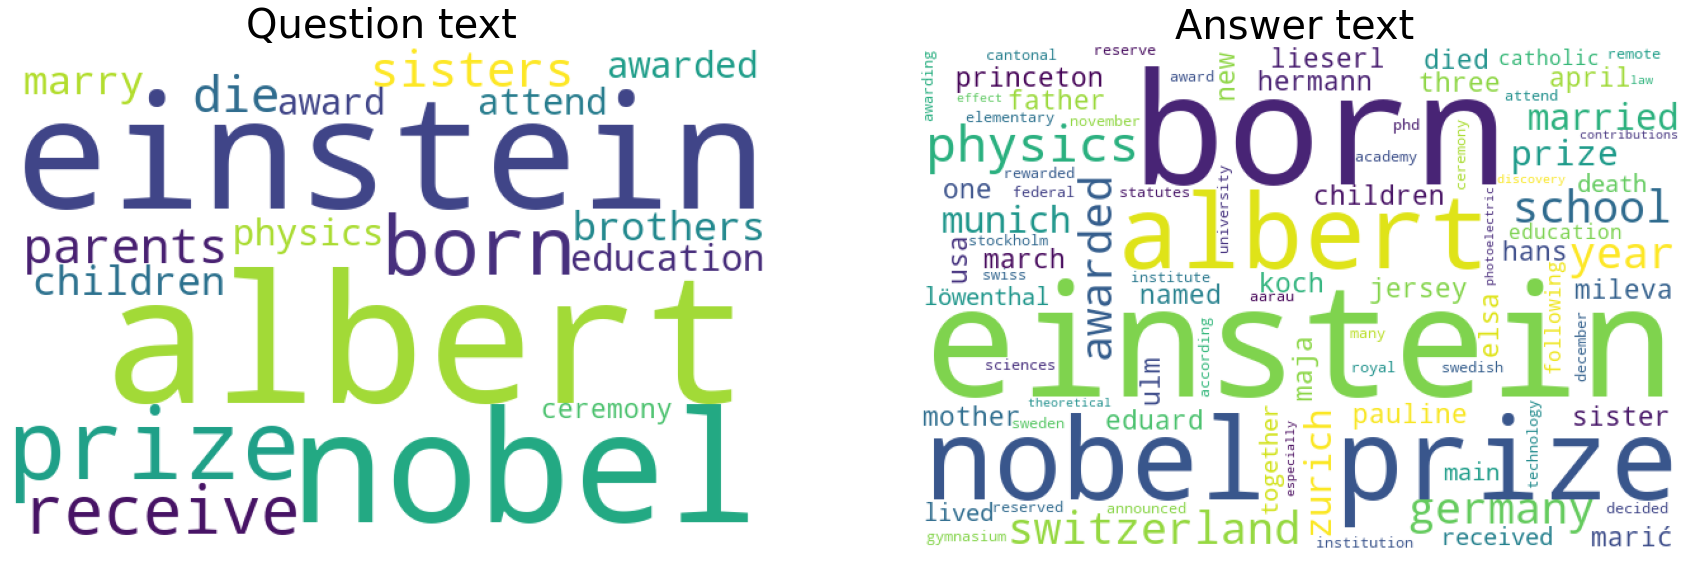

In [64]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 15])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(Question_text_clean))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Question text ',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(Answer_text_clean))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Answer text ',fontsize=40);
